In [ ]:
!git clone https://github.com/utkML/SleepyDriverClassification_2023.git

fatal: destination path 'SleepyDriverClassification_2023' already exists and is not an empty directory.


#Intro to Scikit-Learn

In this lab we are going to be predicting whether a driver is tired or not based on EEG data that was collected from participants. This data was collected with a headset, and particpants drove whilst tired and not tired. By using this collected data and machine learning algorithms we can predict future occurances using EEG data.

<img src="https://neuraldatascience.io/_images/eeg_raw_continuous.jpg">

##Data Analysis

In [ ]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = '/content/SleepyDriverClassification_2023/EGG_data.csv'
dataset = pd.read_csv(file_path)
dataset

,attention,meditation,delta,theta,lowAlpha,highAlpha,lowBeta,highBeta,lowGamma,highGamma,classification
0,26,34,960462,277180,26575,27356,26575,13056,9126,2683,0
1,29,54,39145,28225,20172,39551,20172,9933,5237,4750,0
2,40,48,75410,43144,8601,13564,8601,11663,2515,3251,0
3,66,47,16057,41211,2534,34254,2534,27663,11396,2825,0
4,81,67,10304,47239,33158,47349,33158,16328,5298,5471,0
...,...,...,...,...,...,...,...,...,...,...,...
3730,40,50,148894,18262,9963,1701,9963,2889,1319,498,0
3731,21,48,254724,76658,19773,15432,19773,5208,5047,4062,0
3732,16,64,534312,78775,68120,15326,68120,7347,3183,1314,0
3733,10,63,427017,262229,62326,49406,62326,19779,12966,4820,0


As we can see from the countplot, the distribution of our classes is farely even.

<Axes: xlabel='classification', ylabel='count'>

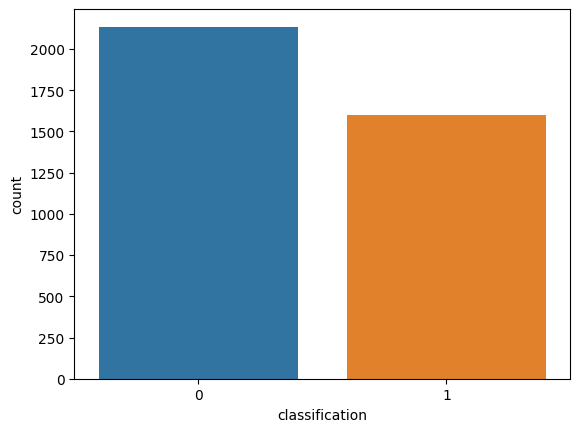

In [ ]:
sns.countplot(dataset, x='classification')

<Axes: >

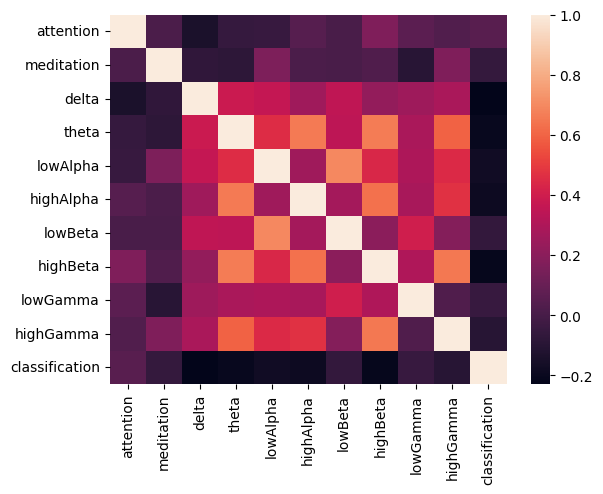

In [ ]:
corr = dataset.corr()
sns.heatmap(corr)

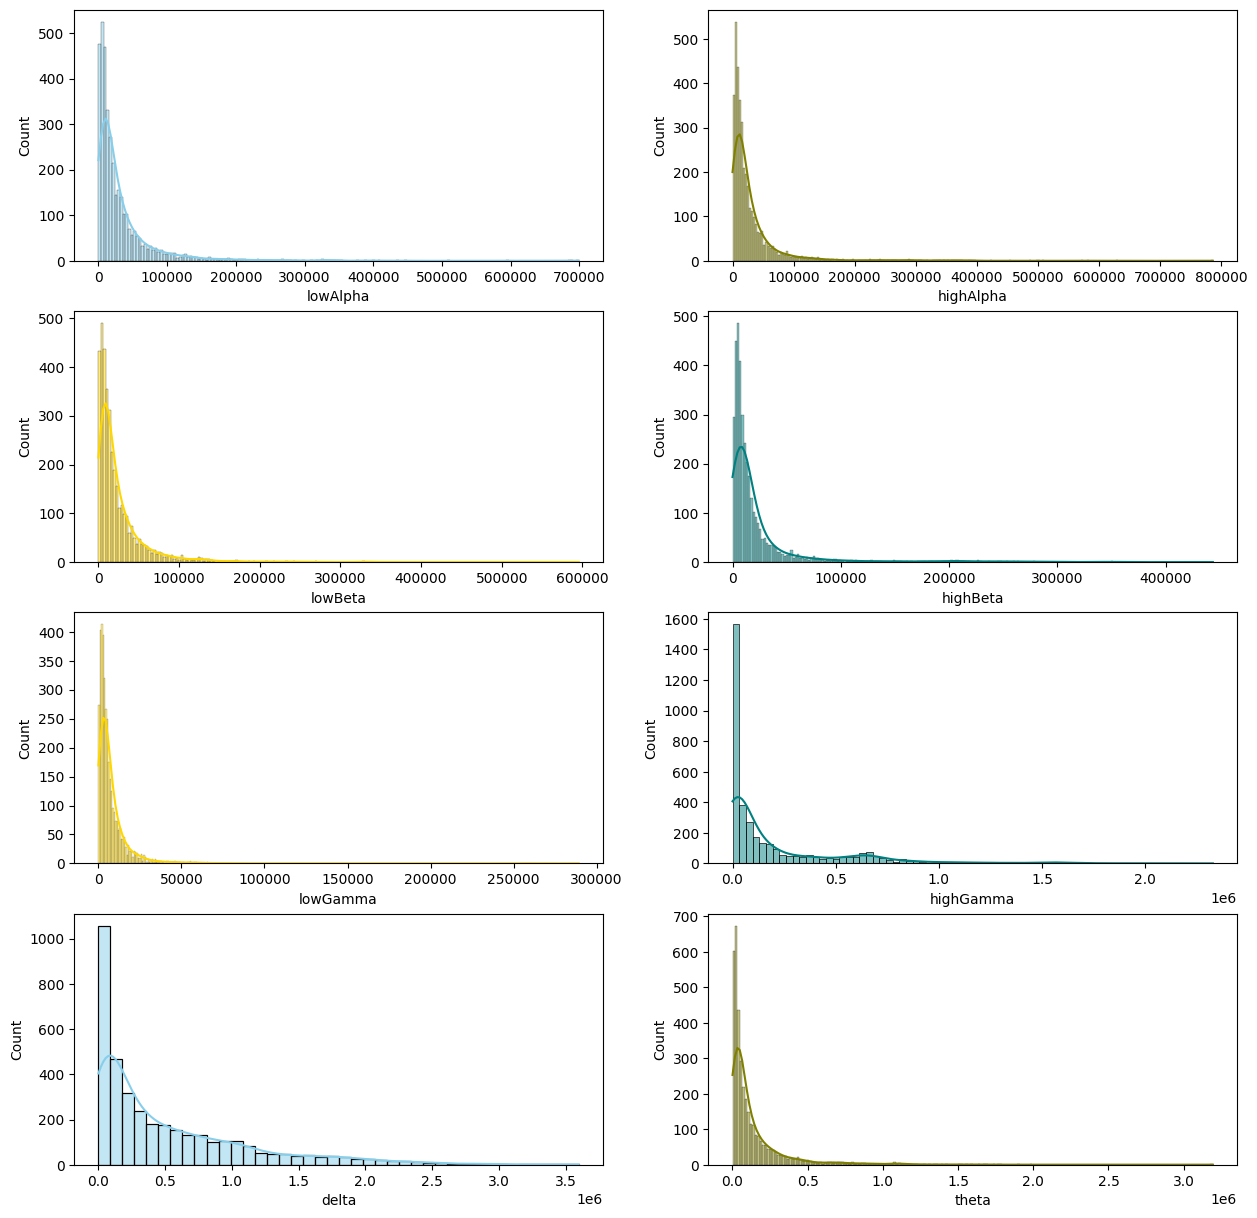

In [ ]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))

sns.histplot(data=dataset, x="lowAlpha", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=dataset, x="highAlpha", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=dataset, x="lowBeta", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=dataset, x="highBeta", kde=True, color="teal", ax=axs[1, 1])
sns.histplot(data=dataset, x="lowGamma", kde=True, color="gold", ax=axs[2, 0])
sns.histplot(data=dataset, x="highGamma", kde=True, color="teal", ax=axs[2, 1])
sns.histplot(data=dataset, x="delta", kde=True, color="skyblue", ax=axs[3, 0])
sns.histplot(data=dataset, x="theta", kde=True, color="olive", ax=axs[3, 1])
plt.show()

In [ ]:
x_data = dataset.drop(['classification'], axis=1)
y_data = dataset['classification']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.7)

The standard scaler scales data between 0 and 1, this can be helpful for multiple algorithms, helping them perform better and faster.

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

##Support Vector Machine (SVM)

A support vector machine aims to find a hyperplane between the various classes. It finds an optimal plane by maximizing the margin between the various classes, datapoints that fall on the margin are called supporting vectors, hence the name, Support Vector Machines.

<img src="https://jeremykun.com/wp-content/uploads/2017/06/svm_solve_by_hand-e1496076457793.gif">

As you can see the SVM is very effective when used on small, less complicated datasets as the one shown above. However, when datasets become complicated and are not easily seperable, a new kernel can be used. The kernel transforms the orignal data into a higher dimensional space, which in some cases can be useful.

<img src="https://miro.medium.com/v2/resize:fit:1400/1*mCwnu5kXot6buL7jeIafqQ.png">

In [ ]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(x_train, y_train)
svm_y_pred = svm_model.predict(x_test)

The SVM has multiple parameters that can be tweaked such as:


*   Kernel - Changes the type of kernel used, such as linear, polynomial, sigmoid, etc.
*   C - A parameter that tweaks the tradeoff between a larger margin, and misclassifications




In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

Below we can see a classification report with multiple metrics to rate our model.

*   Precision is the ratio of true positives to (true positives + false positives)
*   Recall is the ratio of true positives to (true positives + false negatives)
*   F1-score=2×(Precision+Recall/Precision×Recall​) or the harmonic mean of precision and recall




In [ ]:
print(classification_report(svm_y_pred, y_test))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73       596
           1       0.70      0.63      0.67       525

    accuracy                           0.70      1121
   macro avg       0.70      0.70      0.70      1121
weighted avg       0.70      0.70      0.70      1121



##Random Forest Classifier

In a decision tree classifier, the data is then split based on selected features and a tree is made. This can be easily conceptualized as an if-else tree. These models come with a problem though, they are extremely noisy meaning they are susceptible to randomness in data. To fix this multiple decision trees can be made and averaged. This is called a random forest classifier.

<img src = "https://1.bp.blogspot.com/-Ax59WK4DE8w/YK6o9bt_9jI/AAAAAAAAEQA/9KbBf9cdL6kOFkJnU39aUn4m8ydThPenwCLcBGAsYHQ/s0/Random%2BForest%2B03.gif">

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(n_estimators=250)
rfc_model.fit(x_train, y_train)
rfc_y_pred = rfc_model.predict(x_test)

The RFC has multiple parameters that can be tweaked, the most substantial of which are:

*   n_estimators - number of decision trees
*   max_depth - depth of each tree

In [ ]:
print(classification_report(rfc_y_pred, y_test))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       701
           1       0.66      0.74      0.70       420

    accuracy                           0.76      1121
   macro avg       0.75      0.76      0.75      1121
weighted avg       0.77      0.76      0.76      1121



##Naive Bayes

Naive Bayes classifiers use Bayes Theorem to find the probability of an event happening given certain criteria. For example, the weather can be predicted given factors such as humidity and tempurature. The probability of rain is much higher given that it is cloudy outside. The naive bayes classifier tries to find these probabilities with the given data.

<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*Gb2Ifjn1olE5ML6mqY5WNQ.png">

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
nb_pred = nb_model.predict(x_test)

In [ ]:
print(classification_report(nb_pred, y_test))

              precision    recall  f1-score   support

           0       0.27      0.79      0.40       217
           1       0.90      0.47      0.62       904

    accuracy                           0.53      1121
   macro avg       0.58      0.63      0.51      1121
weighted avg       0.78      0.53      0.58      1121



##K Nearest Neighbors

K-Nearest Neighbor is one of the easiest machine learning algorithms. It works by taking an unknown data point and checking the k-nearest data points. Whatever class is more prominent is the class that unknown data point belongs to.

<img src="https://miro.medium.com/v2/resize:fit:1316/1*n9v1xsBi0bek98rqBnWGEg.gif">

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn_model = KNeighborsClassifier(n_neighbors=5)
kn_model.fit(x_train, y_train)
kn_pred = kn_model.predict(x_test)

The k-nearest neighbor algorithm has multiple parameters that can be tweaked for performance:

*   n_neighbors - The number of neighbors to compare to.
*   weights - Whether the distance to a point affects the outcome. (uniform or weighted)



In [ ]:
print(classification_report(kn_pred, y_test))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73       592
           1       0.71      0.64      0.67       529

    accuracy                           0.71      1121
   macro avg       0.71      0.70      0.70      1121
weighted avg       0.71      0.71      0.70      1121

